# 1. First uncomment and  install all the required Packages below.

In [1]:
# pip install torch torchvision numpy opencv-python
#!pip install --user opencv-python
#!pip install easyocr
#pip install pyspellchecker


# 2. From Installed packages import required libraries

In [2]:
import easyocr
import cv2
from matplotlib import pyplot as plt
import pandas as pd
from spellchecker import SpellChecker

# 3. Provide the path of the image in your local device

In [47]:
image_path= r"D:\handwritten Images\b9afd24d812a6d61769845416f139efcd6042914.jpeg"

# 4. Read the image using Opencv and matplotlib to visualize it.

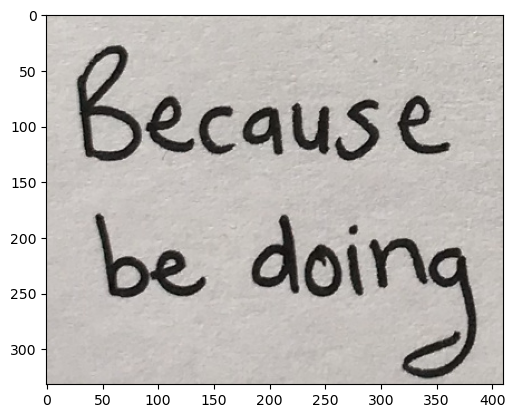

In [48]:
img= cv2.imread(image_path)
plt.imshow(img)
plt.show()

# 5. Reading the text in the image using Easyocr

In [49]:
reader= easyocr.Reader(['en'],gpu=False)
result=reader.readtext(image_path)
result

Using CPU. Note: This module is much faster with a GPU.


[([[19, 21], [376, 21], [376, 147], [19, 147]], 'Because', 0.5920257959285676),
 ([[38, 161], [397, 161], [397, 281], [38, 281]],
  'be doinq',
  0.5847683123708918)]

# 6. Convert the output into DataFrame using Pandas for better understanding.

In [50]:
df = pd.DataFrame(result, columns= ['Cor','text','confidence'])
df

,Cor,text,confidence
0,"[[19, 21], [376, 21], [376, 147], [19, 147]]",Because,0.592026
1,"[[38, 161], [397, 161], [397, 281], [38, 281]]",be doinq,0.584768


# 7.  Extract text column from dataframe and store it in s1 as a string.

In [51]:
s = [str(x) for x in df["text"] ] 
s1 = " ".join(s) 
s1

'Because be doinq'

# 8.  Rectifying the string using Pyspellchecker

In [52]:
spell = SpellChecker()

In [53]:
required_output = ""
for word in s1.split() :
    required_output = required_output + " " + spell.correction(word)

##  This is the corrected output

In [54]:
required_output

' Because be doing'